# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
10122790 - Rafly Maulana Zulyzar</br>



## Menentukan Pertanyaan Bisnis

In [1]:
## Menyaipkan semua library yang dibuthkan

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [16]:
pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 302.2/302.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Wrangling

### Gathering Data

In [3]:
data_hari = pd.read_csv('day.csv')
data_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
data_jam = pd.read_csv('hour.csv')
data_jam

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [5]:
#Data Hari
#Menampilkan 5 baris data pertama
data_hari.head()

#Informasi umum tentang data
data_hari.info()

#Statistik deskriptif
data_hari.describe()

#Mengecek apakah ada data duplicate
data_hari.duplicated().sum()

#Mengecek missing value
data_hari.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Data Jam
#Menampilkan 5 baris data pertama
data_jam.head()

#Informasi umum tentang data
data_jam.info()

#Statistik deskriptif
data_jam.describe()

#Mengecek apakah ada data duplicate
data_jam.duplicated().sum()

#Mengecek missing value
data_jam.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# Load dataset Iris
iris = sns.load_dataset('iris')

print("Data day.csv:")
print(data_hari.head())

print("\nData hour.csv:")
print(data_jam.head())

# Informasi dasar tentang dataset
print(iris.info())

# Statistik deskriptif
print(iris.describe())



Data day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data hour.c

## Data Mining

In [32]:
df = pd.merge(data_hari, data_jam, on='cnt')

In [33]:
print(df.columns)

Index(['instant_x', 'dteday_x', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt', 'instant_y',
       'dteday_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y'],
      dtype='object')


In [38]:
X = df[['hr', 'weekday_x', 'workingday_x', 'holiday_x', 'season_x', 'yr_x', 'mnth_x', 'weathersit_x', 'temp_x',
        'atemp_x', 'hum_x', 'windspeed_x', 'casual_x', 'registered_x']]
y = df['cnt']

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi nilai `count` pada data test
y_pred = model.predict(X_test)

# Menghitung nilai R-squared
r2_score = model.score(X_test, y_test)

# Menghitung nilai MSE(Mean Square Error)
mse = np.mean((y_test - y_pred)**2)

# Mencetak nilai R-squared dan MSE(Mean Square Error)
print('R-squared:', r2_score)
print('MSE(Mean Square Error):', mse)

R-squared: 1.0
MSE(Mean Square Error): 1.4521555120316184e-26


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

#### 1.1 Pada  tanggal berapakah penyewaan sepeda terbanyak?
- 1012290 Ralfy Maulana Zulyzar

In [11]:
#Pengimporan library, data, dan merging data.
import pandas as pd

data_hari = pd.read_csv('day.csv')
data_jam = pd.read_csv('hour.csv')

# Merges dataset day dan hour berdasarkan kolom 'tanggal'
merged_data = pd.merge(data_hari, data_jam, on='dteday')
print(merged_data.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [37]:
# Merges dataset day dan hour berdasarkan kolom 'tanggal'
merged_data = pd.merge(data_hari, data_jam, on='dteday')

# Menghitung jumlah penyewaan sepeda per tanggal
total_penyewaan_per_tanggal = merged_data.groupby('dteday')['registered_x'].sum()

# Menemukan tanggal dengan penyewaan terbanyak
tanggal_terbanyak = total_penyewaan_per_tanggal.idxmax()
jumlah_penyewaan_terbanyak = total_penyewaan_per_tanggal.max()

print(f"Pada tanggal {tanggal_terbanyak}, terdapat {jumlah_penyewaan_terbanyak} penyewa.")

Pada tanggal 2012-09-26, terdapat 166704 penyewa.


#### 2.1 Berapa perbandingan orang yang meregister pada 30 data pertama dari dataset hour.csv?
 - 10122790 Rafly Maulana Zulyzar
 
Dengan mengambil data(seperti contohnya 30 data pertama) dan membandingkannya, kita dapat melihat tren berapa jam kah biasanya rata-rata penyewa ambil dengan line chart.

    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11       

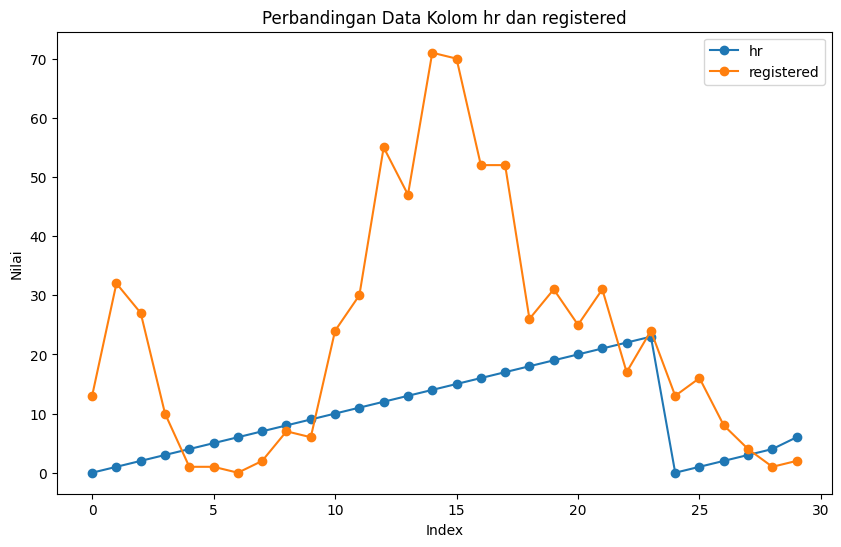

In [17]:
# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data_jam = pd.read_csv('hour.csv')

# Menampilkan beberapa baris pertama data dan informasi umum
print(data_jam.head(30))
print(data_jam.info())

# Ambil 30 data pertama dari kolom 'hr' dan 'registered'
hr_data = data_jam['hr'].head(30)
registered_data = data_jam['registered'].head(30)

# Plotting
plt.figure(figsize=(10, 6))

# Plot kolom 'hr'
plt.plot(hr_data, label='hr', marker='o')

# Plot kolom 'registered'
plt.plot(registered_data, label='registered', marker='o')

# Menambahkan judul dan label
plt.title('Perbandingan Data Kolom hr dan registered')
plt.xlabel('Index')
plt.ylabel('Nilai')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

#### 2.2 Berapa perbandingan total orang yang menyewa tiap bulan?
 - 10122790 Rafly Maulana Zulyzar
Kita dapat melihat tren di bulan keberapakah penyewaan sepeda terbanyak dengan menganalisis perbandingan column cnt(total sewa) pada tiap bulannya.

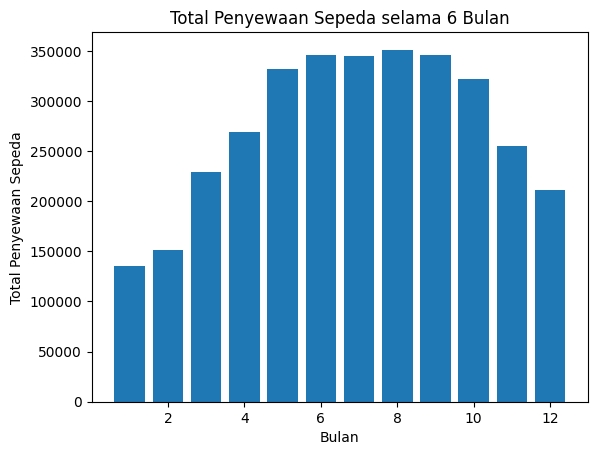

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('day.csv')

# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan
df_groupby_month = df.groupby('mnth')['cnt'].sum()

# Membuat chart bar
plt.bar(df_groupby_month.index, df_groupby_month)
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')

# Menambahkan judul chart
plt.title('Total Penyewaan Sepeda selama 12 Bulan')

# Menampilkan chart
plt.show()

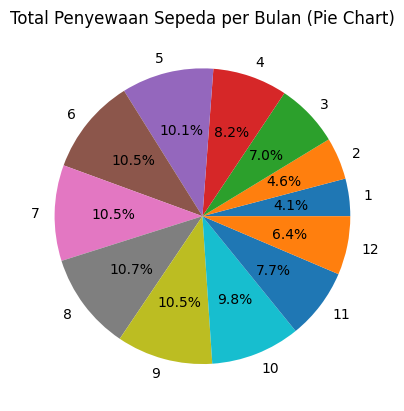

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset day.csv
df = pd.read_csv('day.csv')

# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan
df_groupby_month = df.groupby('mnth')['cnt'].sum()

# Membuat pie chart
plt.pie(df_groupby_month, labels=df_groupby_month.index, autopct='%1.1f%%')
plt.title('Total Penyewaan Sepeda per Bulan (Pie Chart)')

# Menampilkan chart
plt.show()

#### 2.3 Heatmap total sewa selama 6 bulan berdasarkan temperatur?
 - 10122790 Rafly Maulana Zulyzar
 Kita dapat melihat tren pada suhu berapakah biasanya konsumen menyewa sepeda dengan mentotalkan suhu pada tiap bulan(contoh yang diambil yaitu 8 bulan) dan bandingkan total sewa dengan total suhu tiap bulan.

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194


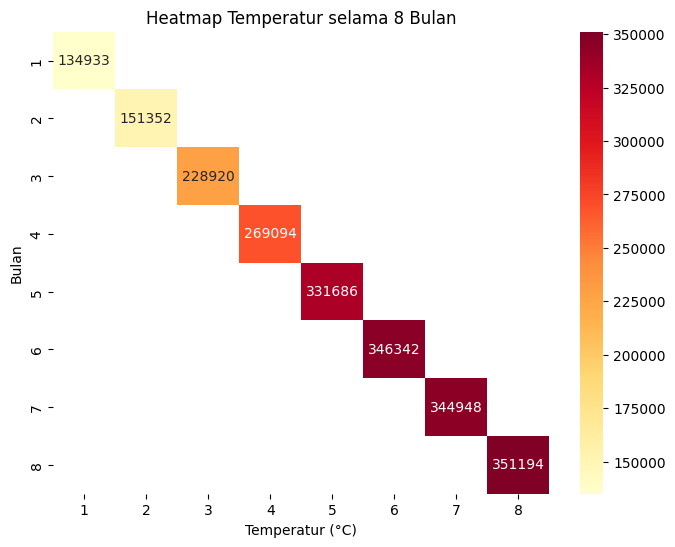

In [29]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan
df_groupby_month = df.groupby('mnth')['cnt'].sum()

# Mengambil data 8 bulan pertama
df_8bulan = df_groupby_month.to_frame().loc[df_groupby_month.index <= 8, :] 

# Menampilkan data tabel
display(df_8bulan)

# Mengatur kolom 'temp' sesuai kebutuhan
df_8bulan['temp'] = df_8bulan.index

# Membuat heatmap data
fig3, ax3 = plt.subplots(figsize=(8, 6))
heatmap_data = df_8bulan.pivot_table(values='cnt', index='mnth', columns='temp', aggfunc='sum')
sns.heatmap(heatmap_data, ax=ax3, annot=True, fmt="g", cmap="YlOrRd")

# Menambahkan judul dan label
plt.title('Heatmap Temperatur selama 8 Bulan')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Bulan')

# Menampilkan plot
plt.show()

#### 2.4 Perbandingan  total penyewaan sepeda di hari kerja dan akhir pekan
Kita dapat melihat tren di hari apakah penyewaan sepeda terbanyak dengan membandingkan nilai total sewa pada hari biasa dengan weekend/holiday.

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


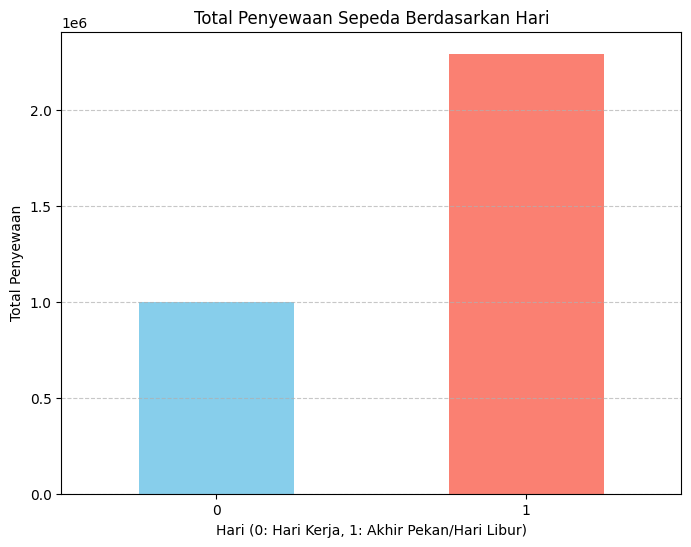

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('day.csv')

# Mengelompokkan data berdasarkan workingday dan menghitung total penyewaan
rentals_by_day_type = df.groupby('workingday')['cnt'].sum()
print(rentals_by_day_type)

# Memvisualisasikan data dengan diagram batang
plt.figure(figsize=(8, 6))
rentals_by_day_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari (0: Hari Kerja, 1: Akhir Pekan/Hari Libur)')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()